# Alejandro Prompt:

You're working at a retail chain analyzing inventory turnover. The store manager needs to understand stock movement patterns to optimize ordering.
we need the data structure as DataFrame
The columns are: 
product_id
category
stock_level
last_restock_date
sales_last_30_days
supplier_lead_time
unit_cost

and we need to calculate:
Calculate inventory turnover rates.
Identify slow-moving items.
Predict potential stockouts.
Create visualizations.

# Generated Code:

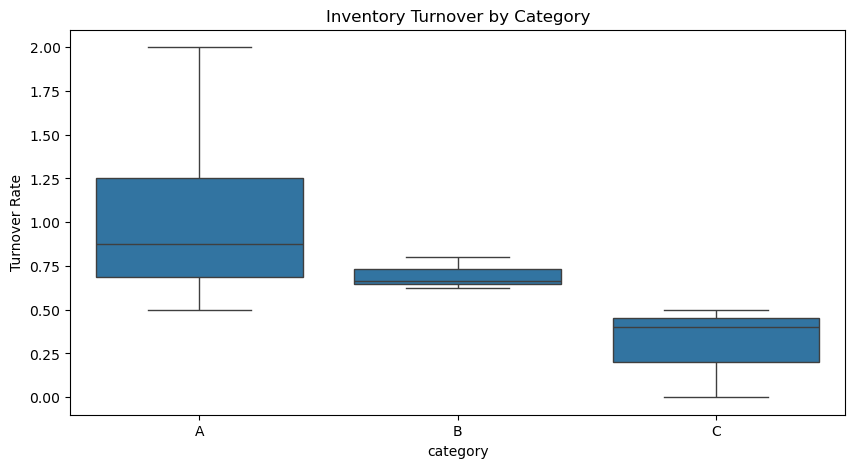

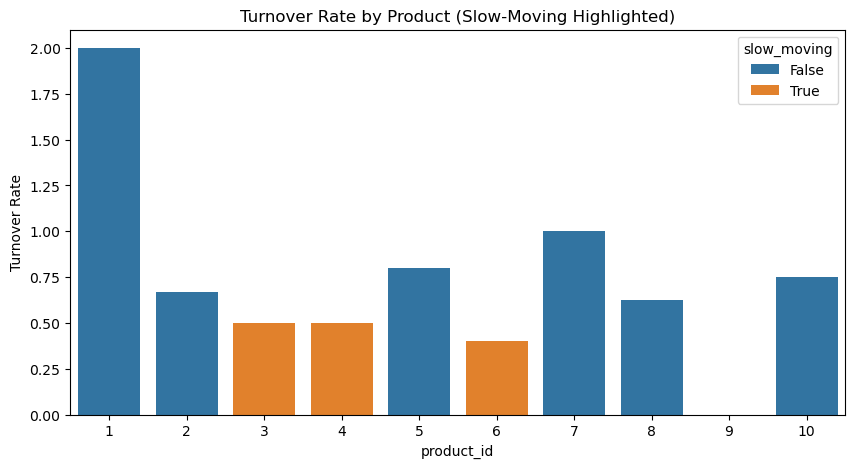

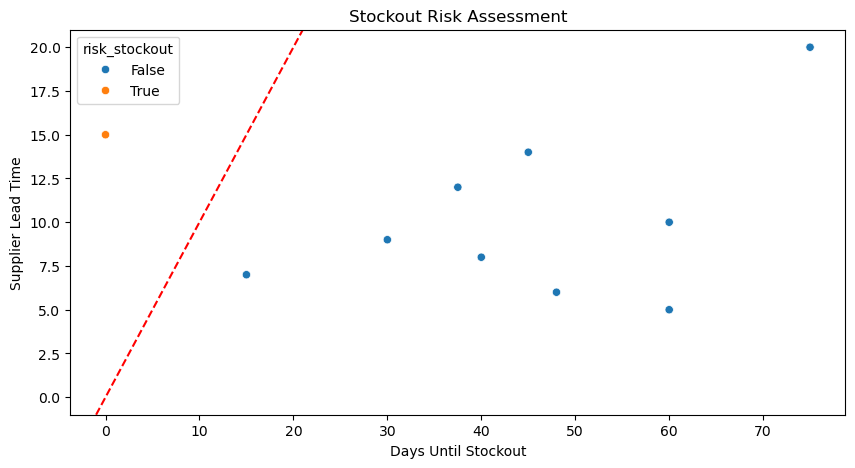

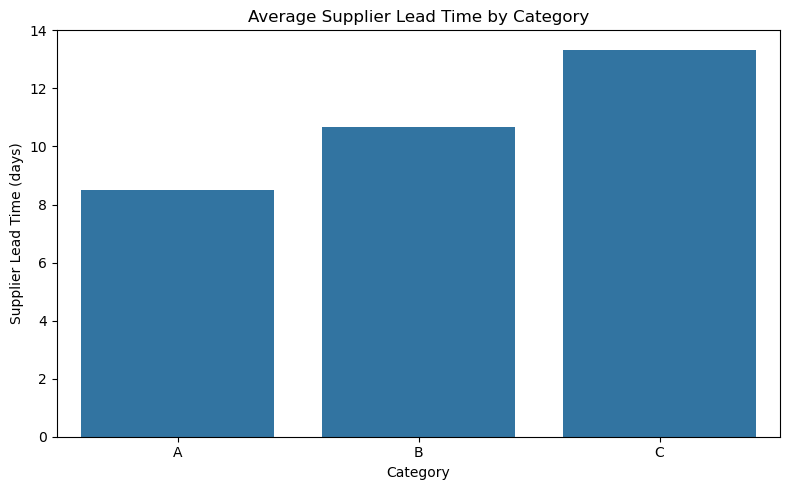

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# Simulated example data
df = pd.DataFrame({
    'product_id': range(1, 11),
    'category': ['A', 'B', 'A', 'C', 'B', 'C', 'A', 'B', 'C', 'A'],
    'stock_level': [50, 30, 20, 10, 100, 5, 15, 40, 0, 8],
    'last_restock_date': pd.date_range(end=datetime.today(), periods=10),
    'sales_last_30_days': [100, 20, 10, 5, 80, 2, 15, 25, 0, 6],
    'supplier_lead_time': [7, 14, 10, 5, 12, 20, 9, 6, 15, 8],
    'unit_cost': [5, 10, 7, 12, 8, 15, 6, 9, 11, 7]
})
# Inventory Turnover = Sales over 30 days / Average Inventory
# Assume average inventory is (stock_level + estimated_stock_30_days_ago)/2; here simplified
df['inventory_turnover'] = df['sales_last_30_days'] / (df['stock_level'] + 1e-5)  # Add small value to avoid division by zero

# Define threshold: turnover less than 0.5 (customize as needed)
df['slow_moving'] = df['inventory_turnover'] < 0.5
slow_items = df[df['slow_moving']]

# Predict days until stockout
df['daily_sales_rate'] = df['sales_last_30_days'] / 30
df['days_until_stockout'] = df['stock_level'] / (df['daily_sales_rate'] + 1e-5)

# Items likely to stock out before next delivery
df['risk_stockout'] = df['days_until_stockout'] < df['supplier_lead_time']
stockout_risks = df[df['risk_stockout']]

# Turnover Rate by Category
plt.figure(figsize=(10, 5))
sns.boxplot(x='category', y='inventory_turnover', data=df)
plt.title('Inventory Turnover by Category')
plt.ylabel('Turnover Rate')
plt.show()

# Highlight Slow-Moving Items
plt.figure(figsize=(10, 5))
sns.barplot(x='product_id', y='inventory_turnover', hue='slow_moving', data=df)
plt.title('Turnover Rate by Product (Slow-Moving Highlighted)')
plt.ylabel('Turnover Rate')
plt.show()

# Risk of Stockout
plt.figure(figsize=(10, 5))
sns.scatterplot(x='days_until_stockout', y='supplier_lead_time', hue='risk_stockout', data=df)
plt.axline((0, 0), slope=1, color='red', linestyle='--')
plt.title('Stockout Risk Assessment')
plt.xlabel('Days Until Stockout')
plt.ylabel('Supplier Lead Time')
plt.show()

# Calculate average supplier lead time per category
category_lead_time = df.groupby('category')['supplier_lead_time'].mean().reset_index()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=category_lead_time, x='category', y='supplier_lead_time')
plt.title('Average Supplier Lead Time by Category')
plt.xlabel('Category')
plt.ylabel('Supplier Lead Time (days)')
plt.tight_layout()
plt.show()



# Follow-up Prompts:

How did different prompts handle date calculations?
days_until_stockout = stock_level / (sales_last_30_days / 30)
Compare to supplier_lead_time

What visualization approaches were suggested?
give me a bar chart where I compare supplier_lead_time per category in the axis (What is the category that it takes longer to re supply)
can you include the average stock per month per category and compare with the average consumption in a chart bar, one bar next to the other one?

How was error handling implemented?
The initial visualization was not good, so I suggested new one
can you calculate the average consumption per month per category? So we see the category(ies) which require more attemtion


# Final Solution:

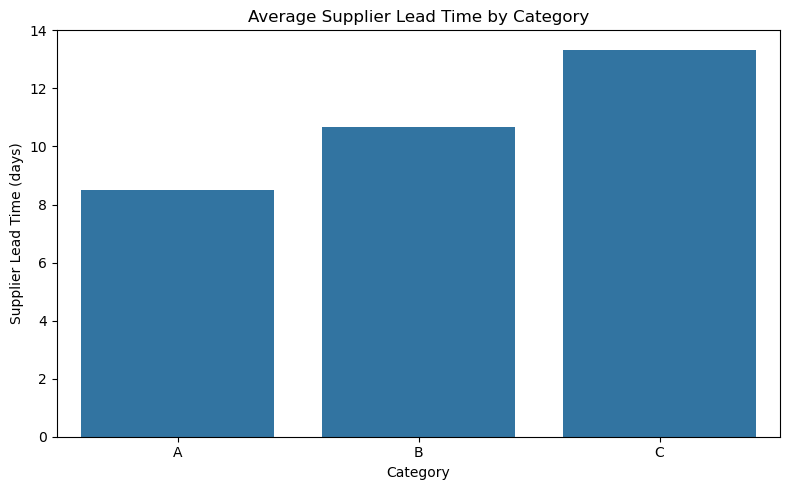

  category  avg_monthly_consumption
0        A                32.750000
1        B                41.666667
2        C                 2.333333


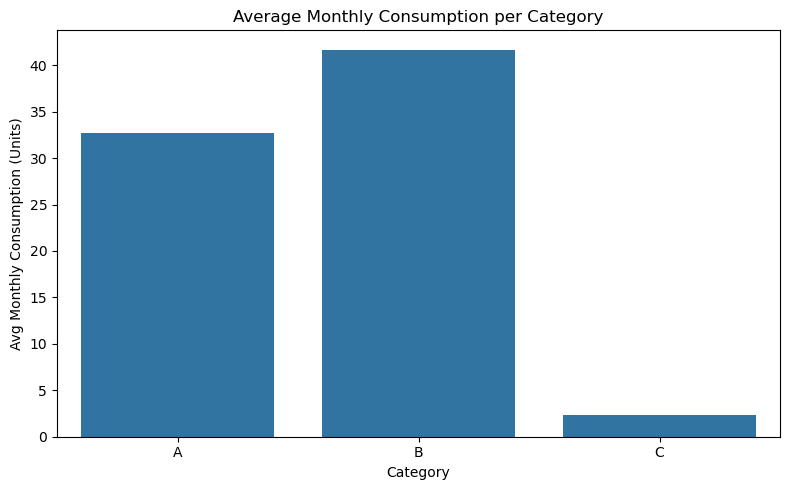

  category  avg_stock  avg_monthly_consumption
0        A  23.250000                32.750000
1        B  56.666667                41.666667
2        C   5.000000                 2.333333


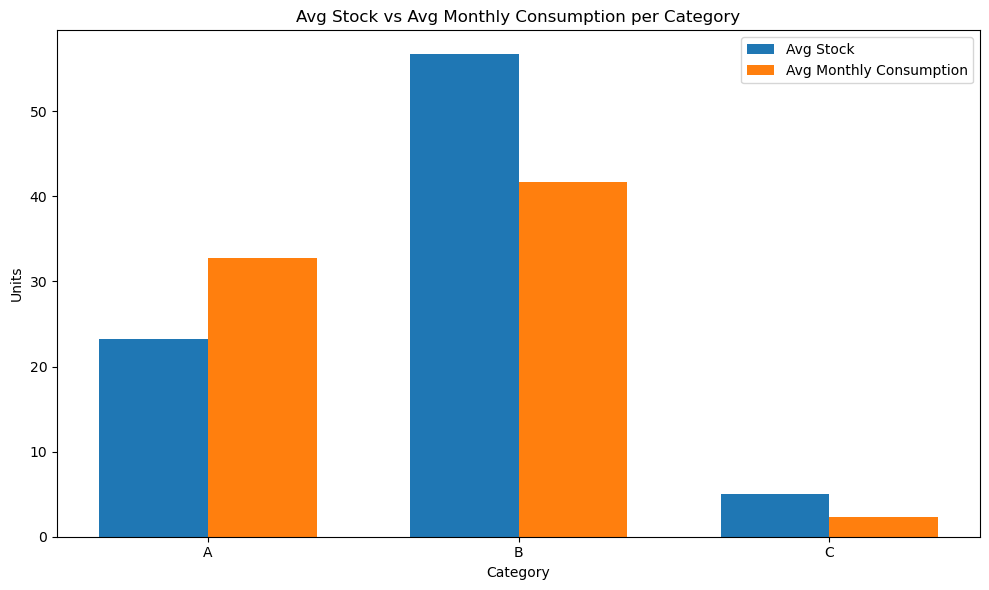

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# Simulated example data
df = pd.DataFrame({
    'product_id': range(1, 11),
    'category': ['A', 'B', 'A', 'C', 'B', 'C', 'A', 'B', 'C', 'A'],
    'stock_level': [50, 30, 20, 10, 100, 5, 15, 40, 0, 8],
    'last_restock_date': pd.date_range(end=datetime.today(), periods=10),
    'sales_last_30_days': [100, 20, 10, 5, 80, 2, 15, 25, 0, 6],
    'supplier_lead_time': [7, 14, 10, 5, 12, 20, 9, 6, 15, 8],
    'unit_cost': [5, 10, 7, 12, 8, 15, 6, 9, 11, 7]
})
# Inventory Turnover = Sales over 30 days / Average Inventory
# Assume average inventory is (stock_level + estimated_stock_30_days_ago)/2; here simplified
df['inventory_turnover'] = df['sales_last_30_days'] / (df['stock_level'] + 1e-5)  # Add small value to avoid division by zero

# Define threshold: turnover less than 0.5 (customize as needed)
df['slow_moving'] = df['inventory_turnover'] < 0.5
slow_items = df[df['slow_moving']]

# Predict days until stockout
df['daily_sales_rate'] = df['sales_last_30_days'] / 30
df['days_until_stockout'] = df['stock_level'] / (df['daily_sales_rate'] + 1e-5)

# Items likely to stock out before next delivery
df['risk_stockout'] = df['days_until_stockout'] < df['supplier_lead_time']
stockout_risks = df[df['risk_stockout']]

# Calculate average supplier lead time per category
category_lead_time = df.groupby('category')['supplier_lead_time'].mean().reset_index()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=category_lead_time, x='category', y='supplier_lead_time')
plt.title('Average Supplier Lead Time by Category')
plt.xlabel('Category')
plt.ylabel('Supplier Lead Time (days)')
plt.tight_layout()
plt.show()

# Group by category and calculate average sales over last 30 days
monthly_avg_consumption = df.groupby('category')['sales_last_30_days'].mean().reset_index()
monthly_avg_consumption.rename(columns={'sales_last_30_days': 'avg_monthly_consumption'}, inplace=True)

# Display the result
print(monthly_avg_consumption)

plt.figure(figsize=(8, 5))
sns.barplot(data=monthly_avg_consumption, x='category', y='avg_monthly_consumption')
plt.title('Average Monthly Consumption per Category')
plt.xlabel('Category')
plt.ylabel('Avg Monthly Consumption (Units)')
plt.tight_layout()
plt.show()

# Calculate average stock and monthly consumption per category
category_stats = df.groupby('category').agg({
    'stock_level': 'mean',
    'sales_last_30_days': 'mean'
}).reset_index()

category_stats.rename(columns={
    'stock_level': 'avg_stock',
    'sales_last_30_days': 'avg_monthly_consumption'
}, inplace=True)

print(category_stats)

# Setup for side-by-side bars
categories = category_stats['category']
x = np.arange(len(categories))  # label locations
width = 0.35  # width of the bars

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, category_stats['avg_stock'], width, label='Avg Stock')
bars2 = ax.bar(x + width/2, category_stats['avg_monthly_consumption'], width, label='Avg Monthly Consumption')

# Labels and formatting
ax.set_xlabel('Category')
ax.set_ylabel('Units')
ax.set_title('Avg Stock vs Avg Monthly Consumption per Category')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()
plt.tight_layout()
plt.show()
